In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Questions


1.   How has the ratio of male to female babies with gender neutral names changed throughout the years 1880 to 2014?
  Names: Casey, Riley, Jessie, Jackie, Avery
2.   When does the name Lauren become more popular than the name Laura?
3.   Did the migration from the midwest (states such as Oklahoma and Arkansas) to California due to the Dust Bowl affect baby naming habits in California?



Data Subsets Used


1.   National, all years, select gender neutral names only, gender and counts
2.   national, all years, Laura and Lauren only, count
3.   state; years 1910 through 1960; OK, AR, and CA; find most popular names in OK/AR in 1910 --> track those names in CA during time period



In [ ]:
# This will run assuming the files are at the home directory
nat_df = pd.read_csv("/NationalNames.csv")
state_df = pd.read_csv(/"StateNames.csv")
# This is how to run the code using Google Drive
#nat_df = pd.read_csv("/content/drive/MyDrive/Data/NationalNames.csv")
#state_df = pd.read_csv("/content/drive/MyDrive/Data/StateNames.csv")
nat_df

,Id,Name,Year,Gender,Count
0,1,Mary,1880,F,7065
1,2,Anna,1880,F,2604
2,3,Emma,1880,F,2003
3,4,Elizabeth,1880,F,1939
4,5,Minnie,1880,F,1746
...,...,...,...,...,...
1825428,1825429,Zykeem,2014,M,5
1825429,1825430,Zymeer,2014,M,5
1825430,1825431,Zymiere,2014,M,5
1825431,1825432,Zyran,2014,M,5


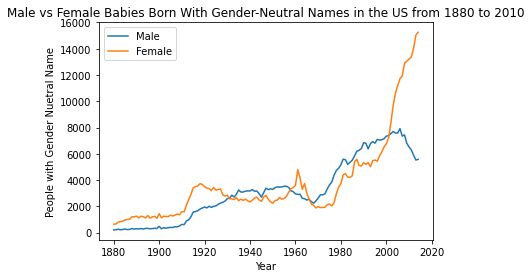

In [ ]:
# Question 1
# Step 1a: Filter out all other names except for the gender-neutral ones we want. Keep all columns for those names.
names = ["Casey", "Riley", "Jessie", "Jackie", "Avery"]
gender_neutral = nat_df.query(f'Name in {names}')
gender_neutral = gender_neutral[["Year", "Gender", "Count"]]

# Step 2a: Group by M/F and sum the counts in each year
gender_neutral = gender_neutral.groupby(["Year", "Gender"]).sum().reset_index()
male = gender_neutral.query('Gender == "M"')
female = gender_neutral.query('Gender == "F"')

# Step 3a: Plot the summed counts of all male babies with the chosen names and 
#  the summed counts of all female babies in each year available;
#  2 lines: one male, one female
fig, ax = plt.subplots() 
ax.plot(male["Year"], male["Count"], label = "Male")
ax.plot(female["Year"], female["Count"], label = "Female")
ax.set_xlabel('Year')  # Add an x-label to the axes.
ax.set_ylabel('People with Gender Nuetral Name')  # Add a y-label to the axes.
ax.set_title("Male vs Female Babies Born With Gender-Neutral Names in the US from 1880 to 2010")
ax.legend()

Text(0.5, 0, 'Years')

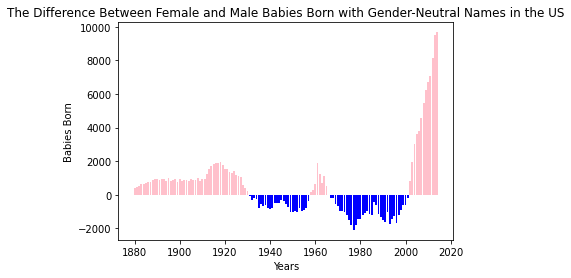

In [ ]:
# Step 3b: Plot the difference (per year) between the female and male summed counts
diffs = np.array(female["Count"]) - np.array(male["Count"])
years = female["Year"]
colors = ['pink' if val >=0 else 'blue' for val in diffs]
plt.bar(x=years, height=diffs, color=colors)
plt.title("The Difference Between Female and Male Babies Born with Gender-Neutral Names in the US")
plt.ylabel("Babies Born")
plt.xlabel("Years")

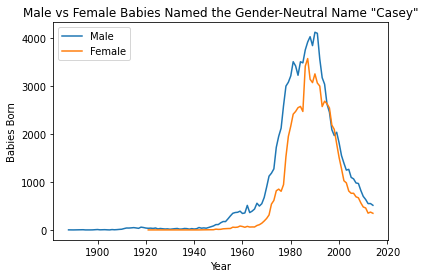

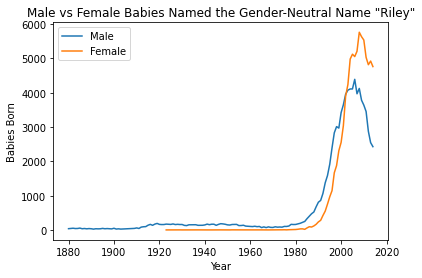

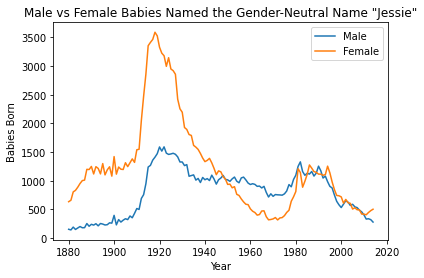

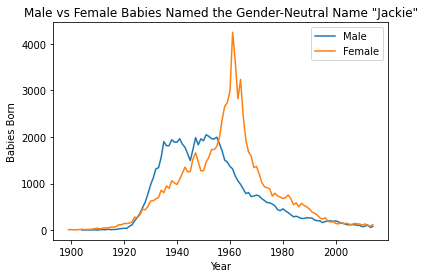

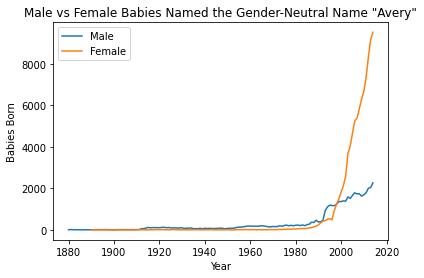

In [ ]:
def plot_name(name):
  # Step 1b: Get the national data for the given baby name and split it into two sets by gender
  name_by_gender = nat_df[nat_df.Name == name].groupby("Gender")
  male = name_by_gender.get_group("M")
  female = name_by_gender.get_group("F")

  # Step 3c: Plot the two gender curves on one plot
  fig, ax = plt.subplots() 
  ax.plot(male["Year"], male["Count"], label = "Male")
  ax.plot(female["Year"], female["Count"], label = "Female")
  ax.set_xlabel('Year')  # Add an x-label to the axis.
  ax.set_ylabel('Babies Born')
  ax.set_title(f'Male vs Female Babies Named the Gender-Neutral Name "{name}"')  # Add a y-label to the axis.
  ax.legend()

# Plot the male and female curves for each of the chosen gender-neutral names
for name in names:
  plot_name(name)

'Lauren' became more popular than 'Laura' in the year 1985


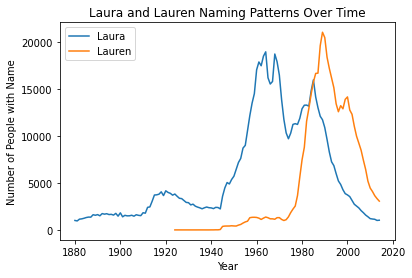

In [ ]:
# Question 2
# Step 1: Get 2 sets of data: one for Laura and one for Lauren, female babies only
laura = nat_df.query('Name == "Laura" and Gender == "F"')
lauren = nat_df.query('Name == "Lauren" and Gender == "F"')

# Step 2: Determine in which year Lauren became more popular than Laura
common_years = list(set(laura['Year']).intersection(set(lauren['Year']))) # can only compare in years when both names reported
laura_common_years = laura[laura['Year'].isin(common_years)]
lauren_common_years = lauren[lauren['Year'].isin(common_years)]
# Get the index where the two curves intersect
idx = np.argwhere(np.diff(np.sign(np.array(lauren_common_years["Count"]) - np.array(laura_common_years["Count"])))).flatten()
print(f"'Lauren' became more popular than 'Laura' in the year {common_years[idx[0]]}")

# Step 3: Plot Laura and Lauren lines on same graph (count vs year)
fig, ax = plt.subplots() 
ax.plot(laura["Year"], laura["Count"], label = "Laura")
ax.plot(lauren["Year"], lauren["Count"], label = "Lauren")
ax.set_xlabel('Year')  # Add an x-label to the axes.
ax.set_ylabel('Number of People with Name')  # Add a y-label to the axes.
ax.set_title("Laura and Lauren Naming Patterns Over Time")
ax.legend()

In [ ]:
# Question 3
# Step 1: Get data only for the Dust Bowl timespan (with buffer),
#  and only for states OK, AR, and CA
year_start = 1910
year_end = 1960
ok = state_df.query(f'State == "OK" and Year >= {year_start} and Year <= {year_end}')
ar = state_df.query(f'State == "AR" and Year >= {year_start} and Year <= {year_end}')
ca = state_df.query(f'State == "CA" and Year >= {year_start} and Year <= {year_end}')

In [ ]:
def get_pop_names(df, year):
  # Get the 5 most popular names in the given DataFrame in the given year
  df = df.query(f'Year == {year}')
  return set(df.sort_values(by = "Count", ascending = False).iloc[0:6]["Name"]) # take the top 5 most common names

In [ ]:
# Step 2: Find most popular name in OK/AR in 1910
ok_pop_names = get_pop_names(ok, year_start)
ar_pop_names = get_pop_names(ar, year_start)
pop_names = list(set.union(ok_pop_names, ar_pop_names)) # Merge the 10 names to remove repeats
print(pop_names)

['John', 'Mary', 'Ruby', 'Ruth', 'James', 'William']


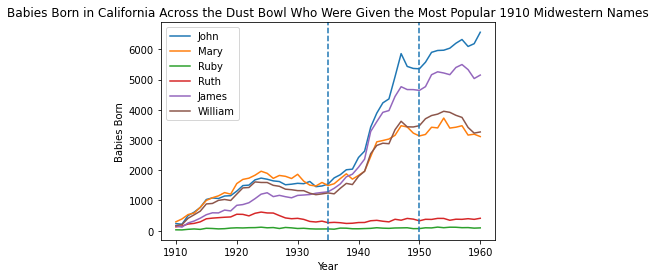

In [ ]:
# Step 3: Plot the count of X name (gender agnostic) in California in the Dust Bowl timespan
def plot_pop_names(title, df, pop_names):
  fig, ax = plt.subplots()
  for name in pop_names:
    name_data = df.query(f'Name == "{name}"')
    ax.plot(name_data["Year"], name_data["Count"], label=name)
  ax.legend()
  ax.set_xlabel("Year")
  ax.set_ylabel("Babies Born")
  ax.set_title(title)

ca = ca.groupby(["Year", "Name"]).sum().reset_index() # sum the counts of males and females of the same name in each year; avoids zig-zag graphs
plot_pop_names(f"Babies Born in California Across the Dust Bowl Who Were Given the Most Popular {year_start} Midwestern Names", ca, pop_names)
plt.axvline(x = 1935, linestyle='--') # Marker for Dust Bowl start
plt.axvline(x = 1950, linestyle='--') # Marker for Dust Bowl peak (nearing end)

Sources


*   https://fivethirtyeight.com/features/there-are-922-unisex-names-in-america-is-yours-one-of-them/ (Most common genter nuetral names)
*   https://migration.ucdavis.edu/rmn/more.php?id=1355
(OK and AR --> CA; starting around 1935, peaked in 1950)

